# tabular-playground-series-jan-2022 EDA(Explanatory Data Analysis)
- データに関する知見だけでなく、データ分析の基礎的な方法をコメントで残す形とする

## 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import itertools

from sklearn.preprocessing import LabelEncoder

sns.set(style='white', context='notebook', palette='pastel')

## 2. Load and check data

### 2.1 Load data

In [2]:
# Load data
##### Load train and Test set

train = pd.read_csv("../data/raw/train.csv")
test = pd.read_csv("../data/raw/test.csv")
# header, index_colを指定する場合
# train = pd.read_csv("../data/raw/train.csv, header=0, index_col=0")

train_len = len(train)
dataset = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)
# reset_index: indexを0から順に振り直す
# drop: Falseの場合、元のindexが「index」列が新たに生成されて残る。Trueの場合「index」列は作られない。

dataset = dataset.drop(columns=['row_id'])
train = train.drop(columns=['row_id'])

dataset.head()

,date,country,store,product,num_sold
0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329.0
1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520.0
2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146.0
3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572.0
4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911.0


### 2.2 check for null and missing values
- 欠損なし！

In [3]:
dataset.isnull().sum()

date           0
country        0
store          0
product        0
num_sold    6570
dtype: int64

###　2.3 check uniqe data
- データはパターン化されている
    - country：３種類
    - store：２種類
    - product：３種類
- （Mugは冬の方が売れそうな気もするがどうだろう）

In [4]:
print(dataset["country"].unique())
print(dataset["store"].unique())
print(dataset["product"].unique())

['Finland' 'Norway' 'Sweden']
['KaggleMart' 'KaggleRama']
['Kaggle Mug' 'Kaggle Hat' 'Kaggle Sticker']


## 3. Feature analysis

### 3.1 Categorical values

#### 各国、店、製品ごとに可視化をしてみる。
- 国ごとで差がありそう。特にNorway。
- 製品は、Hat, Mug, Stickerの順に人気のようで、その傾向は国、店関係なく同じ傾向。
- storeはRamaの方が売り上げが多いようで、その傾向は国、製品関係なく同じ傾向。
- NorwayのHatはやや標準偏差が大きい気がする。


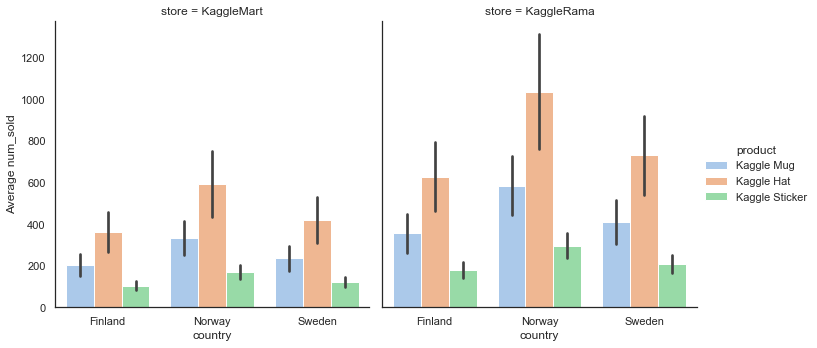

In [5]:
g = sns.catplot(x='country', y='num_sold', hue='product', col='store', data=train, kind='bar', estimator=np.mean, ci='sd')
g = g.set(ylabel='Average num_sold')

In [6]:
train.groupby(['country', 'store', 'product']).describe()

num_sold                                  \
                                     count         mean         std    min   
country store      product                                                   
Finland KaggleMart Kaggle Hat       1461.0   362.479808   97.515965  210.0   
                   Kaggle Mug       1461.0   204.200548   54.378394  126.0   
                   Kaggle Sticker   1461.0   103.044490   21.703357   70.0   
        KaggleRama Kaggle Hat       1461.0   628.926762  165.582345  354.0   
                   Kaggle Mug       1461.0   356.110883   94.885403  220.0   
                   Kaggle Sticker   1461.0   180.232033   38.718906  128.0   
Norway  KaggleMart Kaggle Hat       1461.0   594.645448  158.359675  335.0   
                   Kaggle Mug       1461.0   334.370294   82.256584  201.0   
                   Kaggle Sticker   1461.0   169.577687   34.276759  114.0   
        KaggleRama Kaggle Hat       1461.0  1036.357974  276.772979  596.0   
                   Kaggle Mug       1461.0   584.297741  142.517751  366.0   
                   Kaggle Sticker   1461.0   295.607803   59.471141  214.0   
Sweden  KaggleMart Kaggle Hat       1461.0   419.214237  109.328630  248.0   
                   Kaggle Mug       1461.0   235.885010   59.189067  149.0   
                   Kaggle Sticker   1461.0   119.613279   24.342793   86.0   
        KaggleRama Kaggle Hat       1461.0   731.452430  189.320490  428.0   
                   Kaggle Mug       1461.0   411.273101  104.620331  253.0   
                   Kaggle Sticker   1461.0   208.314853   42.186711  148.0   

                                                                 
                                     25%    50%     75%     max  
country store      product                                       
Finland KaggleMart Kaggle Hat      292.0  350.0   410.0  1113.0  
                   Kaggle Mug      173.0  195.0   224.0   774.0  
                   Kaggle Sticker   89.0  100.0   111.0   326.0  
        KaggleRama Kaggle Hat      515.0  608.0   712.0  1895.0  
                   Kaggle Mug      301.0  340.0   392.0  1398.0  
                   Kaggle Sticker  155.0  174.0   195.0   559.0  
Norway  KaggleMart Kaggle Hat      482.0  571.0   673.0  1809.0  
                   Kaggle Mug      284.0  319.0   367.0  1113.0  
                   Kaggle Sticker  147.0  162.0   182.0   518.0  
        KaggleRama Kaggle Hat      841.0  990.0  1163.0  2884.0  
                   Kaggle Mug      500.0  558.0   639.0  1935.0  
                   Kaggle Sticker  256.0  285.0   319.0   874.0  
Sweden  KaggleMart Kaggle Hat      337.0  408.0   475.0  1207.0  
                   Kaggle Mug      201.0  225.0   253.0   730.0  
                   Kaggle Sticker  105.0  114.0   129.0   356.0  
        KaggleRama Kaggle Hat      591.0  714.0   826.0  2169.0  
                   Kaggle Mug      351.0  394.0   445.0  1438.0  
                   Kaggle Sticker  183.0  198.0   226.0   637.0

#### 箱ひげ図によって、外れ値がどれだけあるか可視化してみる。
- 全体的に多い。また、最大値側に集中している。
- 特売があるのか、祝日なのか、特別な日に大きな売り上げとなっていそう

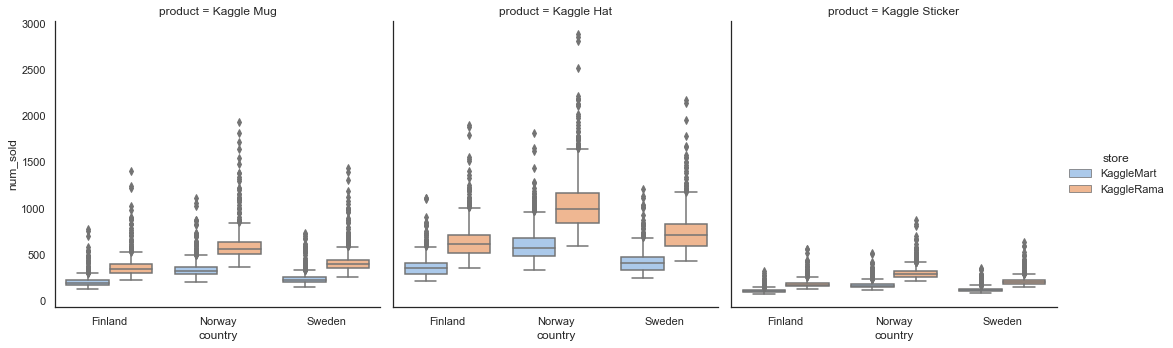

In [7]:
g = sns.catplot(x='country', y='num_sold', hue='store', col='product', data=dataset, kind="box")

### 外れ値となっている行を抽出する
- 外れ値を検出する関数を用意した。
- itertoolsを利用し、３重ループさせる必要のあるところを１行でスッキリと記述する
- かなりの数の外れ値があるので、外れ値になっている日付に傾向がないか、調べる必要がある。

In [8]:
# Outlier detection
def detect_outliers(df, features):
    # 1st quartile (25%)
    Q1 = np.percentile(df[features], 25)

    # 3rd quartile (75%)
    Q3 = np.percentile(df[features],75)

    # Interquartile range (IQR)
    IQR = Q3 - Q1

    # outlier step
    outlier_step = 1.5 * IQR

    # Determine a list of indices of outliers for feature col
    outlier_row = df[(df[features] < Q1 - outlier_step) | (df[features] > Q3 + outlier_step )].index

    return outlier_row

In [9]:
outliers_to_drop = []
for country, store, product in itertools.product(dataset["country"].unique(), dataset["store"].unique(), dataset["product"].unique()):
    outliers_to_drop.extend(detect_outliers(train[(train['country'] == country) & (train['store'] == store) & (train['product'] == product)], 'num_sold'))

# Show the outliers rows
train.loc[outliers_to_drop]

,date,country,store,product,num_sold
0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
18,2015-01-02,Finland,KaggleMart,Kaggle Mug,318
36,2015-01-03,Finland,KaggleMart,Kaggle Mug,360
54,2015-01-04,Finland,KaggleMart,Kaggle Mug,332
6462,2015-12-26,Finland,KaggleMart,Kaggle Mug,338
...,...,...,...,...,...
26225,2018-12-27,Sweden,KaggleRama,Kaggle Sticker,319
26243,2018-12-28,Sweden,KaggleRama,Kaggle Sticker,441
26261,2018-12-29,Sweden,KaggleRama,Kaggle Sticker,596
26279,2018-12-30,Sweden,KaggleRama,Kaggle Sticker,587


### 日付をパラメータ化する
- pd.to_datetime で時間変数に変換することができる。(2015-01-01 とハイフンで区切られるものも扱いやすくなる)
- それぞれを年、月、日のパラメータに分解して新たな列を用意
- さらに、曜日列(dayofweek)を追加（月曜日が0、日曜日が6）

In [10]:
dataset['datetime'] = pd.to_datetime(dataset['date'])
dataset['year'] = dataset['datetime'].dt.year
dataset['month'] = dataset['datetime'].dt.month
dataset['day'] = dataset['datetime'].dt.day
dataset['dayofweek'] = dataset['datetime'].dt.dayofweek

train['datetime'] = pd.to_datetime(train['date'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['dayofweek'] = train['datetime'].dt.dayofweek

dataset.head()

,date,country,store,product,num_sold,datetime,year,month,day,dayofweek
0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329.0,2015-01-01,2015,1,1,3
1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520.0,2015-01-01,2015,1,1,3
2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146.0,2015-01-01,2015,1,1,3
3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572.0,2015-01-01,2015,1,1,3
4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911.0,2015-01-01,2015,1,1,3


### 外れ値の傾向調査
- 1月と４月と12月に外れ値が多い
    - 1月は1〜3日（年始）に多い
    - 4月は上旬に多い傾向
    - 12月は26〜31日（年末）に多い
- 7~10月に外れ値はない

In [11]:
train.loc[outliers_to_drop][['num_sold', 'month']].groupby(['month']).count()

,num_sold
month,
1,163
2,3
3,10
4,113
5,53
6,10
11,4
12,367


<AxesSubplot:>

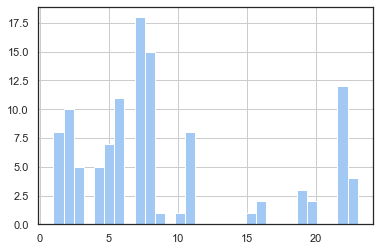

In [12]:
outliers_train = train.loc[outliers_to_drop]
#outliers_train[outliers_train["month"] == 1]['day'].hist(bins=31)
outliers_train[outliers_train["month"] == 4]['day'].hist(bins=30)
#outliers_train[outliers_train["month"] == 12]['day'].hist(bins=31)

### 祝日情報の追加
- 面倒なので一旦なし

### 年ごとの傾向

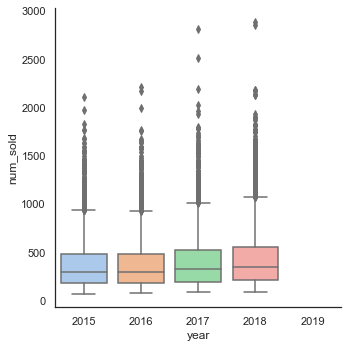

In [14]:
#g = sns.catplot(x='year', y='num_sold', hue='store', col='product', data=dataset, kind="box")
g = sns.catplot(x='year', y='num_sold', data=dataset, kind="box")

### 傾向調査
- 一旦保留

In [ ]:
g = sns.heatmap(train[["num_sold", "month", "day", "dayofweek"]].corr(), annot=True)

## 5.Feature engineering

### 5.1 country/store/product
- label encodingによって数値化する

In [ ]:
category_cols = ['country', 'store', 'product']

for category in category_cols:
    le = LabelEncoder()
    le.fit(dataset[category])
    dataset[category] = le.transform(dataset[category])

dataset.head()

### 5.2 date/datetime/year
- month, day, dayofweekに必要な要素を置き換えているので、削除する

In [ ]:
dataset = dataset.drop(columns=['date', 'datetime', 'year'])

In [ ]:
dataset.tail()

## 6.Save preprocessed dataset

In [ ]:
## Separate train dataset and test dataset
train = dataset[:train_len]
test = dataset[train_len:]
test.drop(columns=['num_sold'], inplace=True)

In [ ]:
train.to_csv("../data/processed/train.csv")
test.to_csv("../data/processed/test.csv")

In [ ]:
train.head()

In [ ]:
test.head()

# 検証中のメモ

### store

In [ ]:
g = sns.catplot(x='store', y='num_sold', hue='country', col='product', data=train, kind='bar', estimator=np.mean, ci='sd')
g = g.set(ylabel='Average num_sold')
train[["country", "num_sold"]].groupby('country').mean()

In [ ]:
g = sns.catplot(x="store", y="num_sold", hue="country", data=train, kind="bar")
g.despine(left=True)

In [ ]:
g = sns.catplot(x="store", y="num_sold", hue="product", data=train, kind="bar", palette="muted")
g.despine(left=True)

In [ ]:
g = sns.catplot(y="num_sold", x="country", hue='store', col='product', data=dataset, kind="box")
g = sns.catplot(y="num_sold", x="store", data=dataset, kind="box")
g = sns.catplot(y="num_sold", x="product", data=dataset, kind="box")

In [ ]:
g = sns.catplot(x="dayofweek", y="num_sold", hue="store", data=dataset, kind="bar", palette="muted")
g.despine(left=True)

In [ ]:
g = sns.catplot(x="month", y="num_sold", hue="store", data=dataset, kind="bar", palette="muted")
g.despine(left=True)

In [ ]:
g = sns.catplot(x="month", y="num_sold", hue="product", data=dataset, kind="bar", palette="muted")
g.despine(left=True)

In [ ]:
g = sns.catplot(x='country', y='num_sold', hue='store', col='product', data=train, kind='violin')
g = g.set(ylabel='Average num_sold' )

In [ ]:
train.shape

In [ ]:
test.shape

In [ ]:
train[train["date"] == '2015-01-01']

In [ ]:
26298 / 9 / (365 * 6 + 366*2)

In [ ]:
6570 / 9

In [ ]:
dataset.head()